In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


$$H_{0}: \mu_{new} \leq \mu_{old}$$

$$H_{1}: \mu_{new} > \mu_{old}$$


In [2]:
# Filter 'view' action
views = df.query("action == 'view'")
views.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [3]:
# Find the avg reading duration if they visiting the site more than once
reading_times = views.groupby(['id', 'group'])['duration'].mean()
reading_times.head()

id      group     
183260  control       107.331484
183615  experiment     24.627594
184277  experiment    193.212489
184360  experiment    226.586283
184589  experiment     12.052097
Name: duration, dtype: float64

In [4]:
# Reset the index so we can work with dataframe, instead of multi index series
reading_times = reading_times.reset_index()
reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [9]:
control_mean = reading_times.query("group == 'control'")['duration'].mean()
experiment_mean = reading_times.query("group == 'experiment'")['duration'].mean()

control_mean, experiment_mean

(115.38637100678429, 131.3208410471793)

In [10]:
# Difference in mean of two groups
obs_diff = experiment_mean - control_mean
obs_diff

15.934470040395013

In [11]:
# Bootstrap sampling
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    reading_times = b_samp.groupby(['id', 'group'])['duration'].mean().reset_index()
    control_mean = reading_times.query("group == 'control'")['duration'].mean()
    experiment_mean = reading_times.query("group == 'experiment'")['duration'].mean()
    diffs.append(experiment_mean-control_mean)

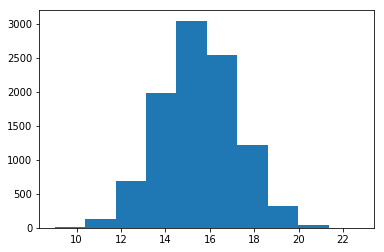

In [13]:
# Plot the sample distribution
plt.hist(diffs);

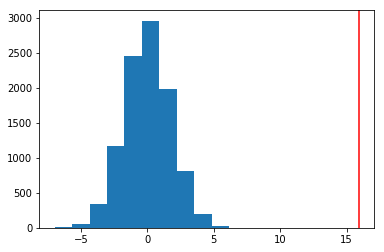

In [14]:
# Simulate the distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red');

In [15]:
# Find the p-value
(null_vals > obs_diff).mean()

0.0

**With Type I error rate of 0.05, we have sufficient to reject the null hypothesis.**

**Based on the result, the Average Reading Duration of the new home page is longer than that of the old one.**